<a href="https://colab.research.google.com/github/pranav-rn/language-detection-model/blob/main/tensorflowproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Detection by NLP Classification Techniques

This project involves detecting the language of the input text

There are four languages the model can detect-


*   English
*   German
*   French
*   Spanish



# Importing Libraries and Dataset

In [ ]:
import tensorflow as tf

### Reading the csv file

We define a function to read the csv file, line by line and split the line at comma

In [ ]:
def get_lines(filename):
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        return file.readlines()

def preprocess_text_with_line_numbers(filename):
    input_lines = get_lines(filename)
    abstract_samples = []
    for line in input_lines[1:]:  # Skip the header line
        line_data = {}
        parts = line.strip().split(',', 1)  # Split only on the first comma
        if len(parts) >= 2:  # Ensure at least two parts exist
            line_data["text"] = parts[0].strip().lower()  # Extract and clean text
            line_data["language"] = parts[1].strip().lower()  # Extract and clean language
            abstract_samples.append(line_data)
        else:
            print("Warning: Skipping line with insufficient columns:", line)
    # Add line numbers and total lines for each sample
    for idx, abstract_sample in enumerate(abstract_samples):
        abstract_sample["line_number"] = idx
        abstract_sample["total_lines"] = len(abstract_samples)
    return abstract_samples




def split_chars(text):
    return " ".join(list(text))

In [ ]:
import os

data_file = '/content/languagesproject.csv'

if os.path.exists(data_file):
    filenames = [data_file]
    print(filenames)

['/content/languagesproject.csv']


In [ ]:
get_lines(filenames[0])[:20]

['text,language\n',
 'ich denke es handelt sich hier um ein missverständnis,german\n',
 'ich habe tom gerade erst verlassen,german\n',
 'tom versuchte mary nur zu ärgern,german\n',
 'tom hat mir die hand geküsst,german\n',
 'ich wusste dass dir das gefiele,german\n',
 'gehen sie mir aus dem weg,german\n',
 'zieht eure schlafanzüge an,german\n',
 'als kind war ich süchtig nach kriminalromanen,german\n',
 'ich habe das auto mit zehn prozent rabatt gekauft,german\n',
 'niemand anders könnte meine arbeit machen,german\n',
 'du bist ein gefangener,german\n',
 'ich gebe dir was du willst,german\n',
 'ich will jetzt nicht weg,german\n',
 'ich habe ihr mein zimmer gezeigt,german\n',
 'ich wüsste nicht weshalb ich mich entschuldigen sollte,german\n',
 'es war kein schöner anblick,german\n',
 'was habt ihr denn die ganze zeit gemacht,german\n',
 'das kind da sieht wie tom aus,german\n',
 'tom wird sich freuen dich wiederzusehen,german\n']

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('languagesproject.csv')

# Shuffle the rows of the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)  # Shuffle with a fixed random state for reproducibility

# Write the shuffled DataFrame back to the CSV file, excluding the index
df_shuffled.to_csv('shuffled_languagesproject.csv', index=False)


In [ ]:
get_lines('shuffled_languagesproject.csv')[:20]

['text,language\n',
 'the grass is always greener on the other side of the fence,english\n',
 'ne le laisse pas le faire par luimême,french\n',
 'no pierdas el tiempo haciendo eso,spanish\n',
 'liebe ist unvernunft,german\n',
 'das lasse ich mir nicht zweimal sagen,german\n',
 'ich weiß nicht wo er sich jetzt aufhält,german\n',
 'está haciendo tiempo frío,spanish\n',
 'wann war das letzte mal dass du auswärts gegessen hast,german\n',
 'sieht so aus als wäre ich hier der einzige der das kann,german\n',
 'mach dich nicht über tom lustig,german\n',
 'i wonder if i hurt toms feelings,english\n',
 'tom tried to cut the deliciouslooking meat with a dull knife,english\n',
 'il habite à la campagne,french\n',
 'der baum ist von alleine umgefallen,german\n',
 'just follow your heart,english\n',
 'although he had many toys his greed made him want more,english\n',
 'tom bought mary a fairly expensive camera,english\n',
 'whats toms job,english\n',
 'tom hat 450\u202fg käse gekauft,german\n']

# Data Preprocessing

In [ ]:
all_samples = preprocess_text_with_line_numbers('shuffled_languagesproject.csv')


import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
train_samples, test_samples = train_test_split(all_samples, test_size=0.2, random_state=42)

In [ ]:
len(train_samples),len(test_samples)

(610947, 152737)

In [ ]:
train_samples, val_samples = train_test_split(train_samples, test_size=0.2, random_state=42)

In [ ]:
len(train_samples),len(test_samples),len(val_samples)

(488757, 152737, 122190)

In [ ]:
df = pd.DataFrame(all_samples)

# Get unique values in the language column
unique_classes = df['language'].unique()

# Count the number of unique classes
num_classes = len(unique_classes)
num_classes

4

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df.head()

,text,language,line_number,total_lines
0,si vous acceptez den commander 3000 nous vous ...,french,118941,763684
1,tom está culpando a mary,spanish,651421,763684
2,oh no mi casa está en llamas,spanish,34021,763684
3,desde arriba se veía el río,spanish,736989,763684
4,tu ne peux pas le gérer seule,french,490056,763684


In [ ]:
train_sentences = train_df.text.to_list()
val_sentences = val_df.text.to_list()
test_sentences = test_df.text.to_list()

train_sentences[:2]

['si vous acceptez den commander 3000 nous vous faisons une remise de trois pour cent',
 'tom está culpando a mary']

### OneHot Encoding the Labels

OneHot Encode the labels to convert categorical variables, such as class labels or words, into binary vectors, preserving relationships and enabling compatibility with machine learning algorithms.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["language"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["language"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["language"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform on training set
train_labels_encoded = label_encoder.fit_transform(train_df["language"].to_numpy())

# Transform validation and test sets using the same encoder fitted on the training set
val_labels_encoded = label_encoder.transform(val_df["language"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["language"].to_numpy())

# Access encoded labels
print("Encoded Train Labels:", train_labels_encoded)

# Reverse transformation to get original labels
train_labels_original = label_encoder.inverse_transform(train_labels_encoded)
val_labels_original = label_encoder.inverse_transform(val_labels_encoded)
test_labels_original = label_encoder.inverse_transform(test_labels_encoded)

# Print corresponding original labels
print("Original Train Labels:", train_labels_original)


Encoded Train Labels: [1 3 3 ... 2 3 2]
Original Train Labels: ['french' 'spanish' 'spanish' ... 'german' 'spanish' 'german']


## Metrics for evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  return {'accuracy' : model_accuracy,
          'precision' : model_precision,
          'recall' : model_recall,
          'f1' : model_f1}

# Model 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels_encoded)
model_0_results = calculate_results(val_labels_encoded, model_0.predict(val_sentences))
model_0_results

{'accuracy': 99.86087241181765,
 'precision': 0.9986113317826635,
 'recall': 0.9986087241181766,
 'f1': 0.9986085367960844}

# Text Vectorization

In [ ]:
sent_length = [len(sentence.split()) for sentence in train_sentences]
tf.math.reduce_mean(sent_length).numpy()



6

In [ ]:
int(np.percentile(sent_length, 95))

11

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=68000,
                                                    output_sequence_length=55)
text_vectorizer.adapt(train_sentences)# By adapting, they ensure that the numerical representations effectively capture the unique characteristics of the text data, leading to better model performance and generalization on various NLP tasks

sample_sentence = 'oh hi today is a nice day'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[4183, 8308,  346,   13,    3,  931,  276,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

# Embedding

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim = 68000,
                                      output_dim=128,
                                      input_length=55,
                                      mask_zero=True)

embedding(text_vectorizer([sample_sentence]))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[-0.02363851, -0.04439172,  0.04848707, ...,  0.025728  ,
          0.03095187,  0.01617611],
        [-0.01107991, -0.00331587,  0.02133738, ..., -0.04214866,
         -0.04487292,  0.00806627],
        [-0.03447198, -0.0481203 ,  0.0470163 , ...,  0.0333493 ,
          0.01920595,  0.0438226 ],
        ...,
        [ 0.01220573,  0.01812663,  0.03520261, ...,  0.02812419,
          0.00619726, -0.04169295],
        [ 0.01220573,  0.01812663,  0.03520261, ...,  0.02812419,
          0.00619726, -0.04169295],
        [ 0.01220573,  0.01812663,  0.03520261, ...,  0.02812419,
          0.00619726, -0.04169295]]], dtype=float32)>

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset = train_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

# Model Development

In [ ]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, kernel_size=5)(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model_1 = tf.keras.models.Model(inputs, outputs)

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1 = model_1.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch = len(train_dataset),
                        validation_data = val_dataset,
                        validation_steps = int(0.2*len(val_dataset)))

Epoch 1/3
7637/7637 [==============================] - 63s 8ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.0055 - val_accuracy: 0.9979
Epoch 2/3
7637/7637 [==============================] - 51s 7ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9985
Epoch 3/3
7637/7637 [==============================] - 52s 7ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9982


<Axes: >

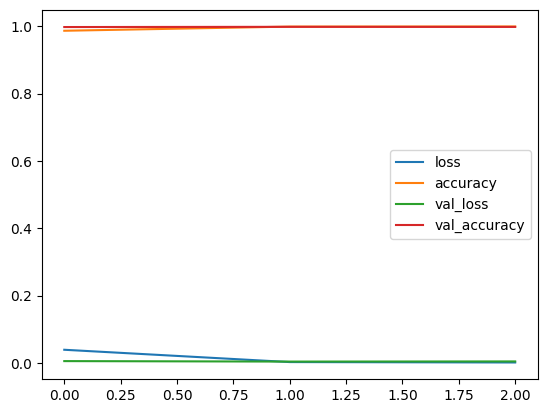

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.evaluate(test_dataset)

2387/2387 [==============================] - 9s 4ms/step - loss: 0.0055 - accuracy: 0.9980


[0.005478627514094114, 0.9980358481407166]

In [ ]:
prediction_array=model_1.predict(['hallo ich bin pranav,ich komme aus indien'])
# Find the index of the maximum probability
predicted_index = np.argmax(prediction_array)

# Use inverse_transform to map the index back to the original language
predicted_language = label_encoder.inverse_transform([predicted_index])

print("Predicted Language:", predicted_language[0])


1/1 [==============================] - 0s 48ms/step
Predicted Language: german


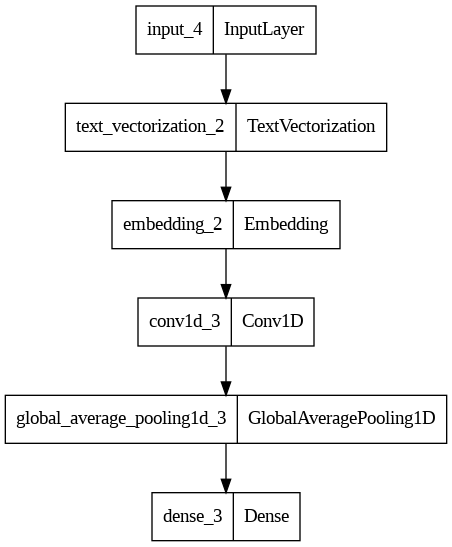

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1)